In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle;

In [2]:
df = pd.read_csv('talong.csv')
df.head()

landType          seedSystem croptype          seedType  harvestArea  prod
0     Upland  Formal Seed System   Talong   Certified Seeds            3     2
1  Irrigated  Formal Seed System   Talong  Registered Seeds            4     8
2     Upland  Formal Seed System   Talong  Registered Seeds            4     2
3  Irrigated  Formal Seed System   Talong   Certified Seeds            4     5
4     Upland  Formal Seed System   Talong  Registered Seeds            3     8

In [3]:
df.shape

(28829, 6)

### 2. Data Pre-processing
* 2.1 Droppping duplicates

In [4]:
df = df.drop_duplicates()

In [5]:
df.shape

(900, 6)

In [6]:
df.dtypes

landType       object
seedSystem     object
croptype       object
seedType       object
harvestArea     int64
prod            int64
dtype: object

In [7]:
df.drop(['croptype'], axis = 1, inplace = True)
df.drop(['seedSystem'], axis = 1, inplace = True)

In [8]:
df.isnull().sum() 

landType       0
seedType       0
harvestArea    0
prod           0
dtype: int64

<AxesSubplot:>

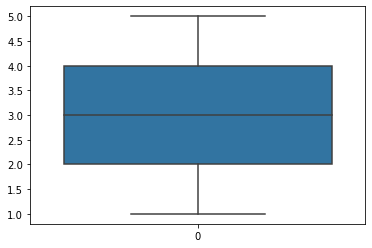

In [9]:
sns.boxplot(df['harvestArea'])

In [10]:
def removeOutliers(df,col):
        q3 = df[col].quantile(0.75);
        q1 = df[col].quantile(0.25);
        iqr = q3 - q1;
        
        max_ = q3 + (iqr * 1.5);
        min_ = q1 - (iqr * 1.5);
        
        df.loc[df[col] >= max_,col] = max_;
        df.loc[df[col] <= min_,col] = min_;

In [11]:
removeOutliers(df,'harvestArea')

<AxesSubplot:>

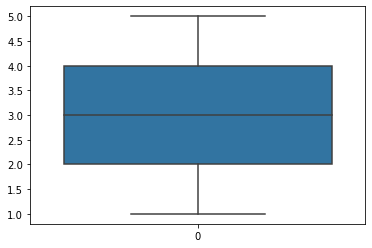

In [12]:
sns.boxplot(df['harvestArea'])

<AxesSubplot:>

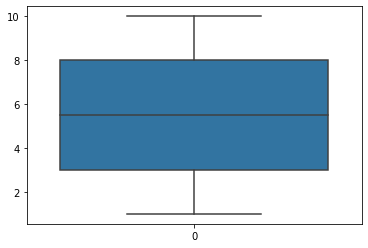

In [13]:
sns.boxplot(df['prod'])

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder();

df_new = df.copy();
df_new

landType          seedType  harvestArea  prod
0              Upland   Certified Seeds            3     2
1           Irrigated  Registered Seeds            4     8
2              Upland  Registered Seeds            4     2
3           Irrigated   Certified Seeds            4     5
4              Upland  Registered Seeds            3     8
...               ...               ...          ...   ...
5641           Upland   Certified Seeds            4     8
5855  Rainfed Lowland      Hybrid Seeds            2    10
6126  Rainfed Lowland      Hybrid Seeds            2     1
6305  Rainfed Lowland  Registered Seeds            3     1
6547  Rainfed Lowland   Certified Seeds            1    10

[900 rows x 4 columns]

In [15]:
df['landType'].unique()

array(['Upland', 'Irrigated', 'Rainfed Lowland'], dtype=object)

In [16]:
# df['seedSystem'].unique()

In [17]:
df['seedType'].unique()

array(['Certified Seeds', 'Registered Seeds', 'Hybrid Seeds'],
      dtype=object)

In [18]:
df_new

landType          seedType  harvestArea  prod
0              Upland   Certified Seeds            3     2
1           Irrigated  Registered Seeds            4     8
2              Upland  Registered Seeds            4     2
3           Irrigated   Certified Seeds            4     5
4              Upland  Registered Seeds            3     8
...               ...               ...          ...   ...
5641           Upland   Certified Seeds            4     8
5855  Rainfed Lowland      Hybrid Seeds            2    10
6126  Rainfed Lowland      Hybrid Seeds            2     1
6305  Rainfed Lowland  Registered Seeds            3     1
6547  Rainfed Lowland   Certified Seeds            1    10

[900 rows x 4 columns]

In [19]:
enLT = encoder.fit(df_new['landType'])
# import pickle
with open('enLT.pkl', 'wb') as f:
    pickle.dump(enLT, f)

with open('enLT.pkl', 'rb') as f:
    landType_loaded = pickle.load(f)

In [20]:
landType_loaded.transform(['Rainfed Lowland'])

array([1])

In [21]:
# enSS = encoder.fit(df_new['seedSystem'])

# # import pickle
# with open('enSS.pkl', 'wb') as f:
#     pickle.dump(enSS, f)
    
# with open('enSS.pkl', 'rb') as f:
#     seedSystem_loaded = pickle.load(f)

In [22]:
# seedSystem_loaded.transform(['Informal Seed System'])

In [23]:
enST = encoder.fit(df_new['seedType'])

# import pickle
with open('enST.pkl', 'wb') as f:
    pickle.dump(enST, f)

with open('enST.pkl', 'rb') as f:
    seedType_loaded = pickle.load(f)

In [24]:
seedType_loaded.transform(['Certified Seeds'])

array([0])

In [25]:
df_new['seedType'] = encoder.fit_transform(df_new['seedType'])
df_new['landType'] = encoder.fit_transform(df_new['landType'])
# df_new['seedSystem'] = encoder.fit_transform(df_new['seedSystem'])

In [26]:
df_new

landType  seedType  harvestArea  prod
0            2         0            3     2
1            0         2            4     8
2            2         2            4     2
3            0         0            4     5
4            2         2            3     8
...        ...       ...          ...   ...
5641         2         0            4     8
5855         1         1            2    10
6126         1         1            2     1
6305         1         2            3     1
6547         1         0            1    10

[900 rows x 4 columns]

In [27]:
df_new.dtypes

landType       int32
seedType       int32
harvestArea    int64
prod           int64
dtype: object

In [28]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_new.copy()
scaler = MinMaxScaler()

for col in df_scaled.columns:
    if (col != 'prod'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1));

In [29]:
df_scaled

landType  seedType  harvestArea  prod
0          1.0       0.0         0.50     2
1          0.0       1.0         0.75     8
2          1.0       1.0         0.75     2
3          0.0       0.0         0.75     5
4          1.0       1.0         0.50     8
...        ...       ...          ...   ...
5641       1.0       0.0         0.75     8
5855       0.5       0.5         0.25    10
6126       0.5       0.5         0.25     1
6305       0.5       1.0         0.50     1
6547       0.5       0.0         0.00    10

[900 rows x 4 columns]

<AxesSubplot:>

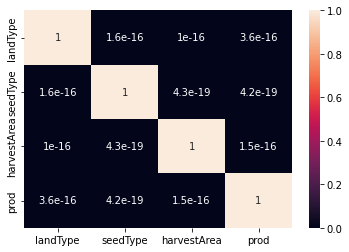

In [30]:
sns.heatmap(df_scaled.corr(),annot=True)

In [31]:
corr = df_scaled.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

corr_df

Empty DataFrame
Columns: [0]
Index: []

### Modelling

In [32]:
X = df_scaled.drop(['prod'],axis=1); #dropping the 'class' column or target variable 
y = df_scaled['prod']; #getting the target variable

In [33]:
from sklearn.model_selection import train_test_split #import the library
# stratify will balance the partition of the dataset for training and testing data
#the partition of the datasets are 80 percent in training data and 20 percent in test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)#, shuffle=True

In [34]:
from sklearn.metrics import r2_score;
from sklearn.metrics import mean_absolute_error;
from sklearn.metrics import mean_squared_error;

def evaluateModel(model):
    y_pred = model.predict(X_test);
    print('R^2 Score : ', r2_score(y_test,y_pred));
    print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred));
    print('RSME : ',np.sqrt(mean_squared_error(y_test,y_pred)))
    
    plt.scatter(y_train, model.predict(X_train),color='g')
    plt.plot(y_pred,y_pred)
    plt.show()

* 3.3.1 GradientBoostingRegressor

R^2 Score :  -0.061473549267547556
Mean Absolute Error :  2.577045137975576
RSME :  2.950995571723546


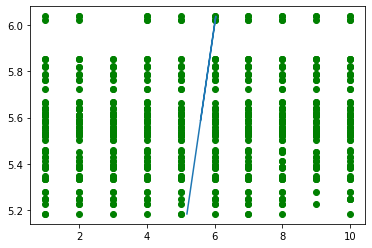

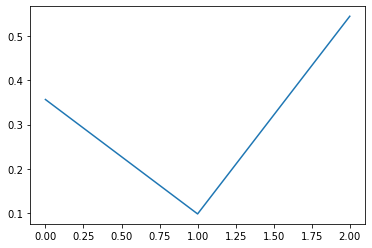

In [35]:
from sklearn.ensemble import GradientBoostingRegressor;

gbr = GradientBoostingRegressor();
gbr.fit(X_train,y_train);
evaluateModel(gbr);
plt.plot(gbr.feature_importances_)

* 3.3.2 Random Forest Regressor

R^2 Score :  -0.08606553801969286
Mean Absolute Error :  2.593999569988111
RSME :  2.9849838530001094


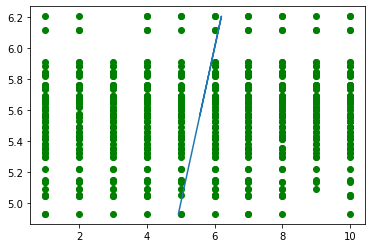

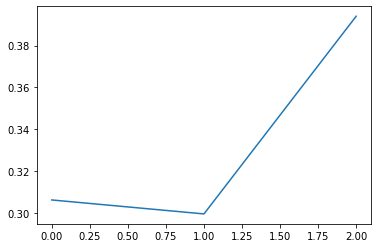

In [36]:
from sklearn.ensemble import RandomForestRegressor;


rf = RandomForestRegressor();
rf.fit(X_train,y_train);
evaluateModel(rf);

plt.plot(rf.feature_importances_)

* 3.3.3 ElasticNet

R^2 Score :  -0.010868859828975896
Mean Absolute Error :  2.521975308641975
RSME :  2.879793708854083


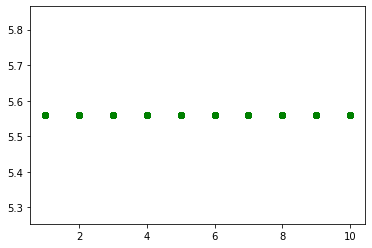

In [37]:
from sklearn.linear_model import ElasticNet;

en = ElasticNet();
en.fit(X_train,y_train);
evaluateModel(en);

* 3.3.4 SGDRegressor

R^2 Score :  -0.012436889093773384
Mean Absolute Error :  2.5221514145430373
RSME :  2.8820263679221094


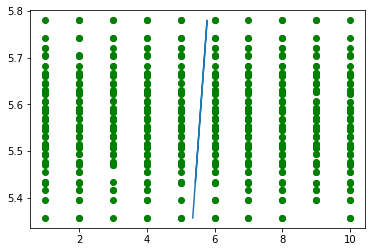

In [38]:
from sklearn.linear_model import SGDRegressor;

sgd = SGDRegressor();
sgd.fit(X_train,y_train);
evaluateModel(sgd);

* 3.3.5 BayesianRidge

R^2 Score :  -0.01087288498261052
Mean Absolute Error :  2.5219821963147857
RSME :  2.879799442337938


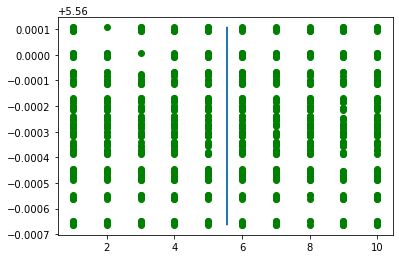

In [39]:
from sklearn.linear_model import BayesianRidge;

br = BayesianRidge();
br.fit(X_train,y_train);
evaluateModel(br);

* 3.3.6 LinearRegression

R^2 Score :  -0.011356132673484565
Mean Absolute Error :  2.522705284690798
RSME :  2.8804877040228627


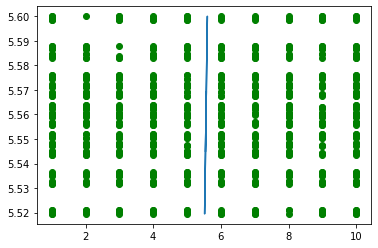

In [40]:
from sklearn.linear_model import LinearRegression;

r = LinearRegression();
r.fit(X_train, y_train);
evaluateModel(r)

* 3.3.7 XGB Regressor

R^2 Score :  -0.08490730024790905
Mean Absolute Error :  2.59538094997406
RSME :  2.9833917560294276


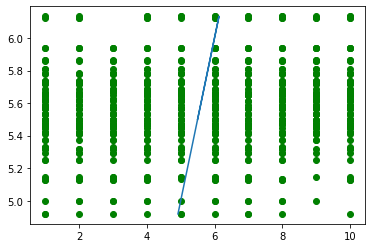

In [41]:
from xgboost import XGBRegressor;

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
evaluateModel(xgb)

* 3.3.8 LGBM Regressor

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 3
[LightGBM] [Info] Start training from score 5.559722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

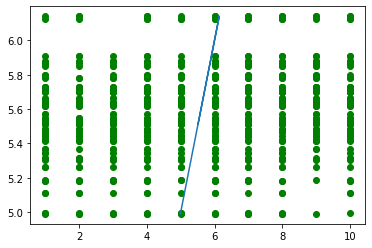

In [42]:
from lightgbm import LGBMRegressor;

lg = LGBMRegressor()
lg.fit(X_train, y_train)
evaluateModel(lg)

R^2 Score :  -0.011350492195883577
Mean Absolute Error :  2.52269775961051
RSME :  2.8804796715659946


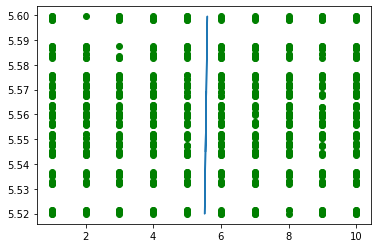

In [43]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

evaluateModel(ridge)

In [44]:
with open('talongModel.pkl', 'wb') as f:
    pickle.dump(sgd, f)
    
with open('talongModel.pkl', 'rb') as f:
    talongmodel = pickle.load(f)

In [45]:
print(talongmodel)

SGDRegressor()


In [46]:
st = seedType_loaded.transform(['Certified Seeds'])
print(st)
# ss = seedSystem_loaded.transform(['Formal Seed System'])
# print(ss)
lt = landType_loaded.transform(['Upland'])
print(lt)

[0]
[2]


In [48]:
area= 5

In [49]:
st = float(st)  # Convert st to a float
lt = float(lt)  # Convert lt to a float
area = float(area) 

In [50]:
params = [[st, lt, area]]
pred = talongmodel.predict(params)
print(pred)

[6.42794568]
